# Simple iteration for systems of linear equations

First, generate a random diagonally dominant matrix, for testing.

In [1]:
import numpy as np
import matplotlib.pyplot as plt


rndm = np.random.RandomState(1234)

n = 10
A = rndm.uniform(size=(n, n)) + np.diagflat([15]*n)
b = rndm.uniform(size=n)

# I.  Jacobi iteration

Given

$$
A x = b
$$

separate the diagonal part $D$,

$$ A = D + (A - D) $$

and write

$$
x = D^{-1} (D - A) x + D^{-1} b\;.
$$

Then iterate

$$
x_{n + 1} = B x_{n} + c\;,
$$

where 

$$
B = D^{-1} (A - D) \qquad \text{and} \qquad c = D^{-1} b
$$


Let's construct the matrix and the r.h.s. for the Jacobi iteration

In [4]:
diag_1d = np.diag(A)

B = -A.copy()
np.fill_diagonal(B, 0)

D = np.diag(diag_1d)
invD = np.diag(1./diag_1d)
BB = invD @ B 
c = invD @ b

In [5]:
# sanity checks
from numpy.testing import assert_allclose

assert_allclose(-B + D, A)


# xx is a "ground truth" solution, compute it using a direct method
xx = np.linalg.solve(A, b)

np.testing.assert_allclose(A@xx, b)
np.testing.assert_allclose(D@xx, B@xx + b)
np.testing.assert_allclose(xx, BB@xx + c)

Check that $\| B\| \leqslant 1$:

In [6]:
np.linalg.norm(BB)

0.36436161983015336

### Do the Jacobi iteration

In [7]:
n_iter = 50

x0 = np.ones(n)
x = x0
for _ in range(n_iter):
    x = BB @ x + c

In [8]:
# Check the result:

A @ x - b

array([ 1.11022302e-16,  0.00000000e+00, -2.22044605e-16, -1.11022302e-16,
        1.11022302e-16,  0.00000000e+00, -2.08166817e-17,  0.00000000e+00,
       -2.77555756e-17,  1.11022302e-16])

### Task I.1

Collect the proof-of-concept above into a single function implementing the Jacobi iteration. This function should receive the r.h.s. matrix $A$, the l.h.s. vector `b`, and the number of iterations to perform.


The matrix $A$ in the illustration above is strongly diagonally dominant, by construction. 
What happens if the diagonal matrix elements of $A$ are made smaller? Check the convergence of the Jacobi iteration, and check the value of the norm of $B$.

(20% of the total grade)


In [12]:

def Jacobi(A, b, it):
    

    diag_1d = np.diag(A)

    B = -A.copy()
    np.fill_diagonal(B, 0)
    

    D = np.diag(diag_1d)
    invD = np.diag(1./diag_1d)
    BB = invD @ B 
    c = invD @ b
    
    x0 = np.ones(np.shape(A)[0])
    x = x0
    for _ in range(it):
        x = BB @ x + c
        
    print(np.linalg.norm(BB))
    return x

0.3952024971656453
0.3952024971656453
0.3952024971656453
0.3952024971656453
0.3952024971656453
0.3952024971656453
0.3952024971656453
0.3952024971656453
0.3952024971656453
0.3952024971656453
0.3952024971656453
0.3952024971656453
0.3952024971656453
0.3952024971656453
0.3952024971656453
0.3952024971656453
0.3952024971656453
0.3952024971656453
0.3952024971656453
0.3952024971656453
0.3952024971656453
0.3952024971656453
0.3952024971656453
0.3952024971656453
0.3952024971656453
0.3952024971656453
0.3952024971656453
0.3952024971656453
0.3952024971656453
0.3952024971656453
0.3952024971656453
0.3952024971656453
0.3952024971656453
0.3952024971656453
0.3952024971656453
0.3952024971656453
0.3952024971656453
0.3952024971656453
0.3952024971656453
0.3952024971656453
0.3952024971656453
0.3952024971656453
0.3952024971656453
0.3952024971656453
0.3952024971656453
0.3952024971656453
0.3952024971656453
0.3952024971656453
0.3952024971656453
0.3952024971656453


<IPython.core.display.Javascript object>


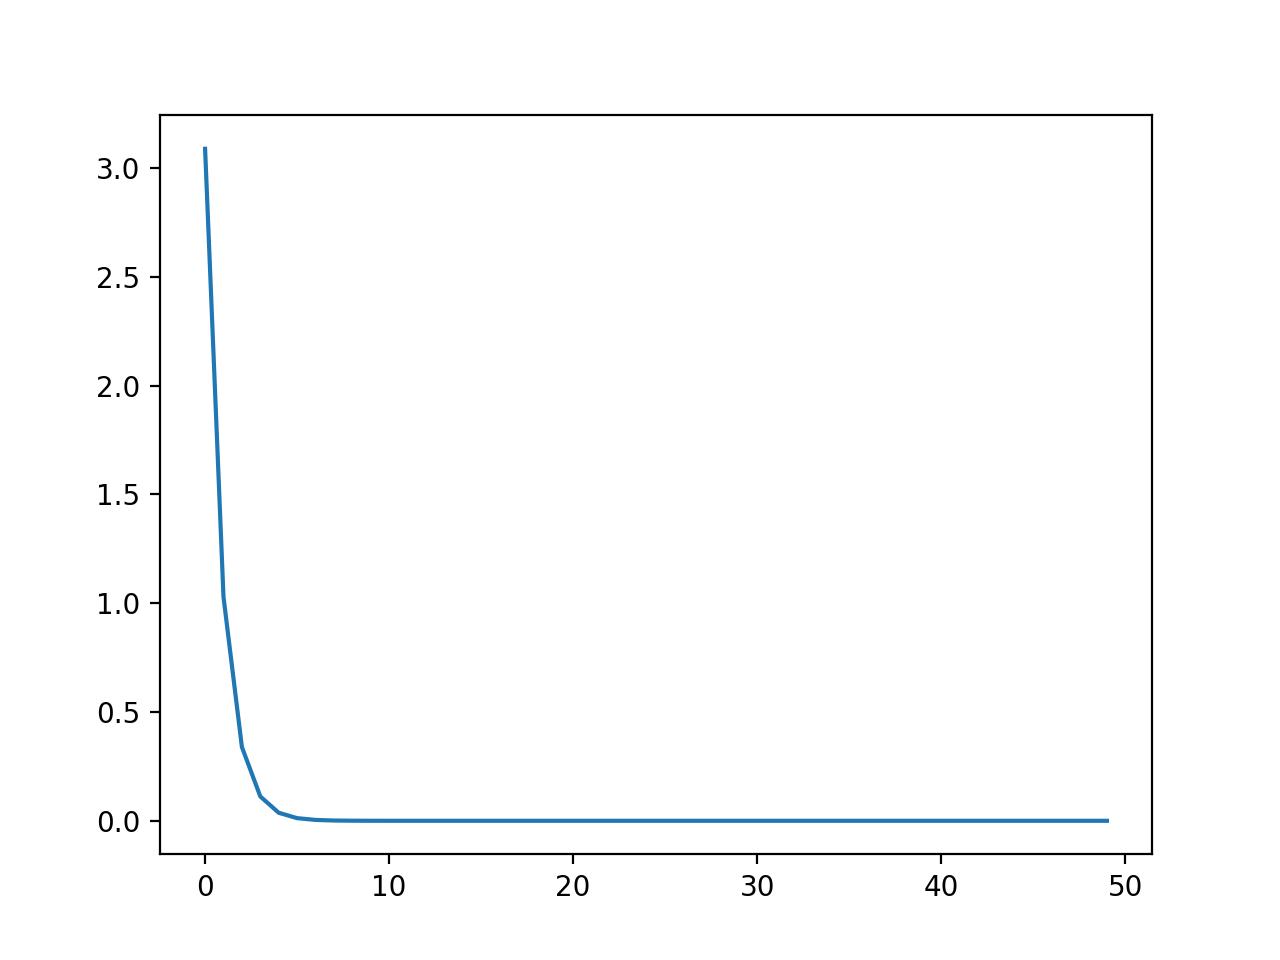

In [13]:
#Проверим strongly diag
%matplotlib notebook

ex1 = rndm.uniform (size = (n, n))
pr = np.diagflat ([15] * n)
ex1 += pr
ex2 = rndm.uniform (size = n)


ii = np.arange(50)
ans = np.linalg.solve(ex1, ex2)
xs = []

for i in ii:
    k = Jacobi(ex1, ex2, i) 
    k -= ans
    xs.append(np.linalg.norm(k))
    
plt.plot(ii, xs)

#сходится

<IPython.core.display.Javascript object>


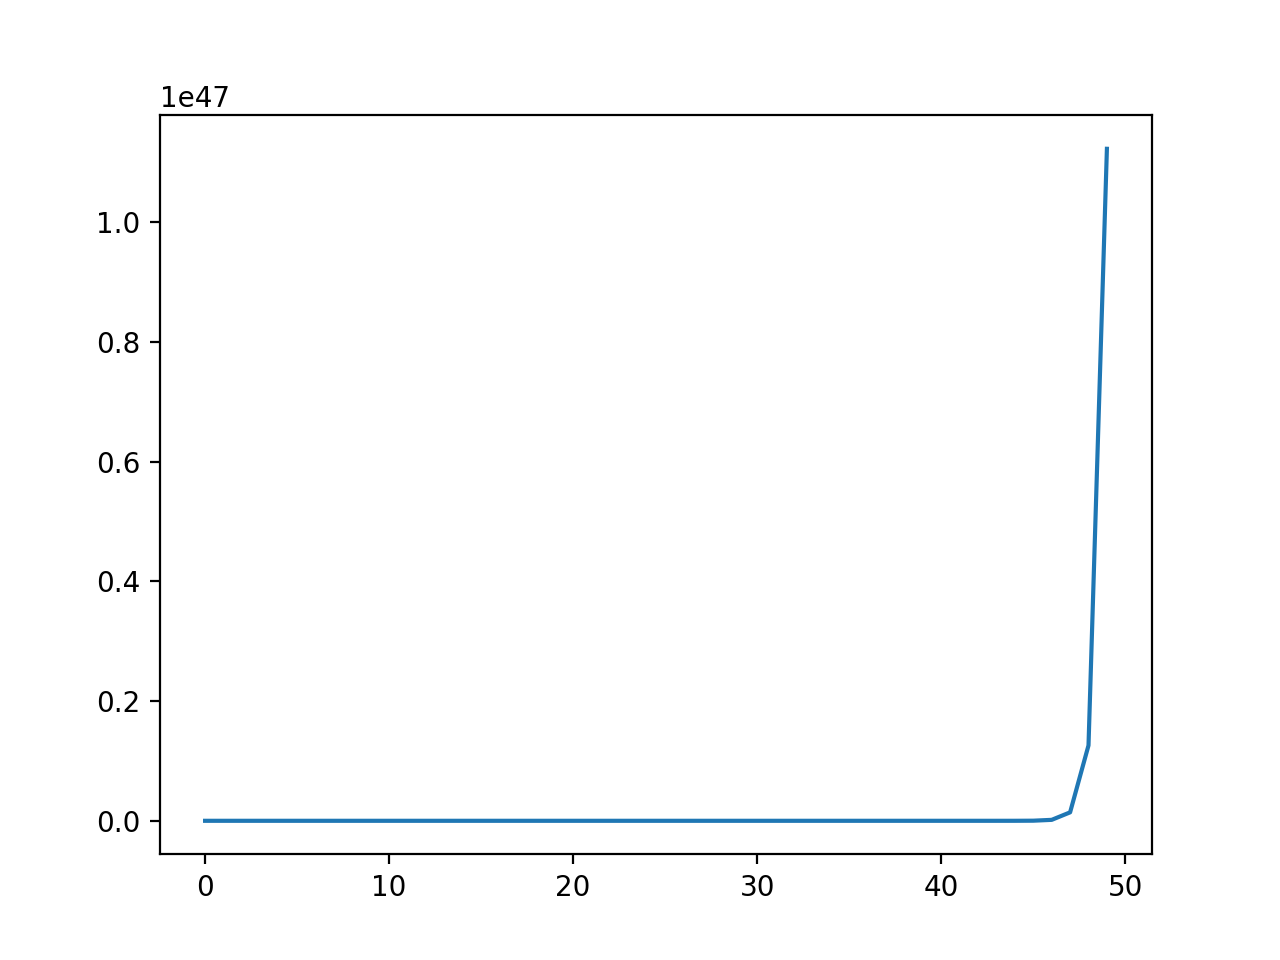

9.40350631558956
9.40350631558956
9.40350631558956
9.40350631558956
9.40350631558956
9.40350631558956
9.40350631558956
9.40350631558956
9.40350631558956
9.40350631558956
9.40350631558956
9.40350631558956
9.40350631558956
9.40350631558956
9.40350631558956
9.40350631558956
9.40350631558956
9.40350631558956
9.40350631558956
9.40350631558956
9.40350631558956
9.40350631558956
9.40350631558956
9.40350631558956
9.40350631558956
9.40350631558956
9.40350631558956
9.40350631558956
9.40350631558956
9.40350631558956
9.40350631558956
9.40350631558956
9.40350631558956
9.40350631558956
9.40350631558956
9.40350631558956
9.40350631558956
9.40350631558956
9.40350631558956
9.40350631558956
9.40350631558956
9.40350631558956
9.40350631558956
9.40350631558956
9.40350631558956
9.40350631558956
9.40350631558956
9.40350631558956
9.40350631558956
9.40350631558956


In [14]:
#now not a strongly diag
plt.figure()

ex3 = rndm.uniform (size = (n, n))
pr = np.diagflat (n)
ex3 += pr
ex4 = rndm.uniform (size = n)

ii = np.arange(50)
ans = np.linalg.solve(ex3, ex4)
xs = []

for i in ii:
    k = Jacobi(ex3, ex4, i) 
    k -= ans
    xs.append(np.linalg.norm(k))
    
plt.plot(ii, xs)

#расходится

# II. Seidel's iteration.

##### Task II.1

Implement the Seidel's iteration. 

Test it on a random matrix. Study the convergence of iterations, relate to the norm of the iteration matrix.

(30% of the total grade)

# III. Minimum residual scheme

### Task III.1

Implement the $\textit{minimum residual}$ scheme: an explicit non-stationary method, where at each step you select the iteration parameter $\tau_n$ to minimize the residual $\mathbf{r}_{n+1}$ given $\mathbf{r}_n$. Test it on a random matrix, study the convergence to the solution, in terms of the norm of the residual and the deviation from the ground truth solution (which you can obtain using a direct method). Study how the iteration parameter $\tau_n$ changes as iterations progress.

(50% of the grade)

<IPython.core.display.Javascript object>


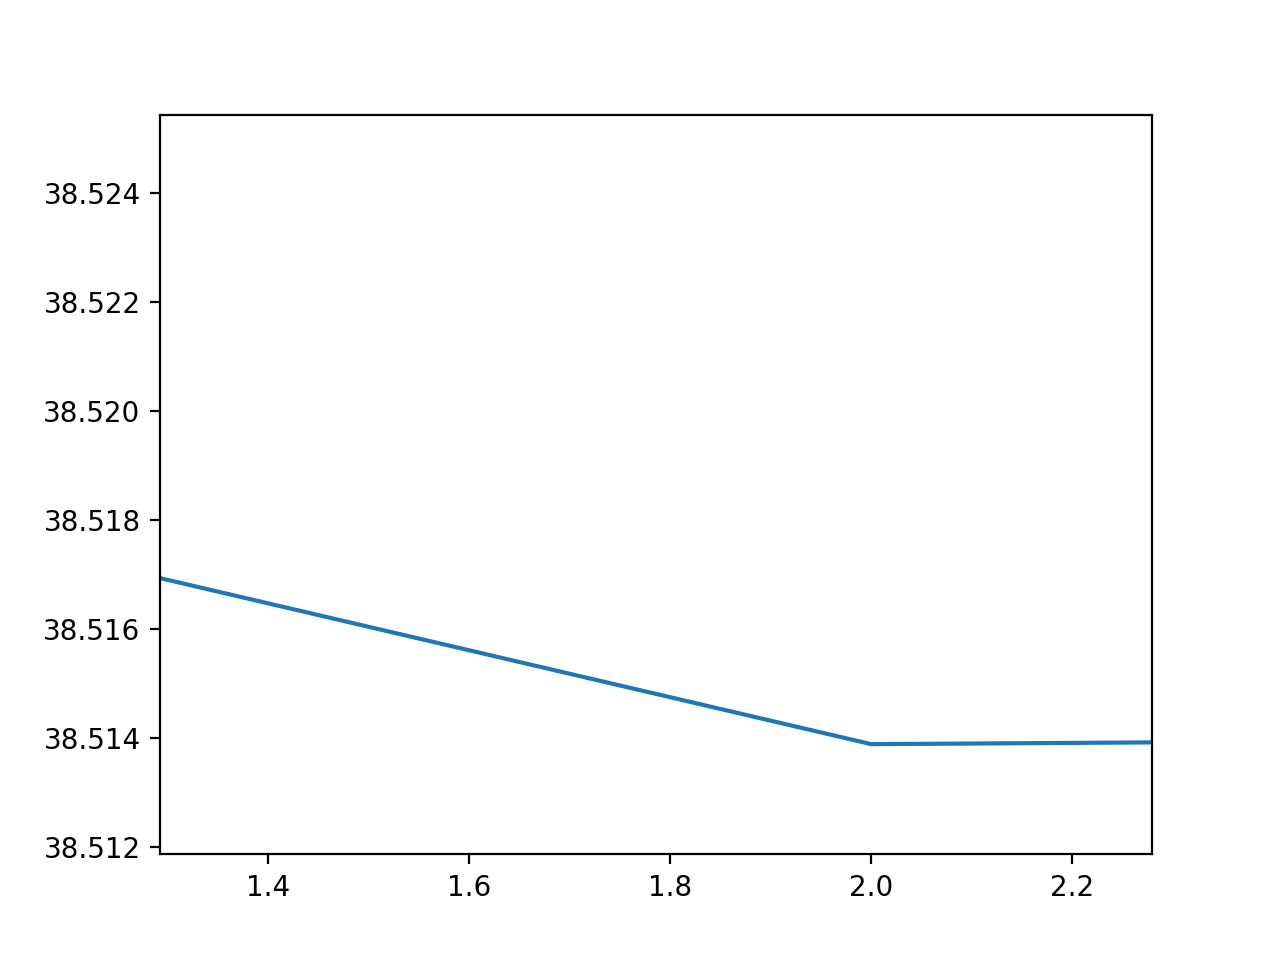

In [22]:
plt.figure()

def mrs (A, b, it):
    
    x = np.ones(np.shape(A)[0])
    
    for _ in range (it):
        
        rs = A @ x - b
        
        if np.linalg.norm(A @ rs) < 1e-36: #разнца существенная в завсмост от степени
            
            return x
        
        else:
            
            ar = A @ rs
            tau = np.dot(rs, ar) 
            zn = np.linalg.norm(A @ rs)
            zn = zn * zn
            tau = tau / zn
            x -= tau * rs
        
    return x

        

ex7 = rndm.uniform (size = (n, n))
ex2 = rndm.uniform(size=n)
ii = np.arange(50)
mrsres = []
ans = np.linalg.solve(ex7, ex2)



for it in ii:
    
    k = mrs(ex7, ex2, it)
    k = np.linalg.norm(k)
    mrsres.append(np.linalg.norm(k - ans)) 
    
plt.plot(ii, mrsres)
